In [7]:

# 1. IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


# 2. LOAD THE DATASET
df = pd.read_csv('books.csv', on_bad_lines='skip')
print("Dataset loaded successfully.")


# 3. CLEAN THE DATA (THE FINAL FIX)


prices_no_symbol = df['price'].str.replace('Â£', '')



df['price'] = pd.to_numeric(prices_no_symbol, errors='coerce')
print("'price' column has been successfully cleaned!")


# 4. VERIFY THE FIX

print("\n--- Data Info After Cleaning ---")

df.info()


missing_prices = df['price'].isnull().sum()
print(f"\nNumber of rows with missing/unconvertible prices: {missing_prices}")


print("\n--- Cleaned Data Head ---")
display(df.head())

Libraries imported successfully!
Dataset loaded successfully.
'price' column has been successfully cleaned!

--- Data Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   price   1000 non-null   float64
 2   stock   1000 non-null   object 
 3   rating  1000 non-null   object 
 4   url     1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB

Number of rows with missing/unconvertible prices: 0

--- Cleaned Data Head ---


,title,price,stock,rating,url
0,A Light in the Attic,51.77,In stock,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,http://books.toscrape.com/catalogue/sapiens-a-...


--- Creating Visualizations ---


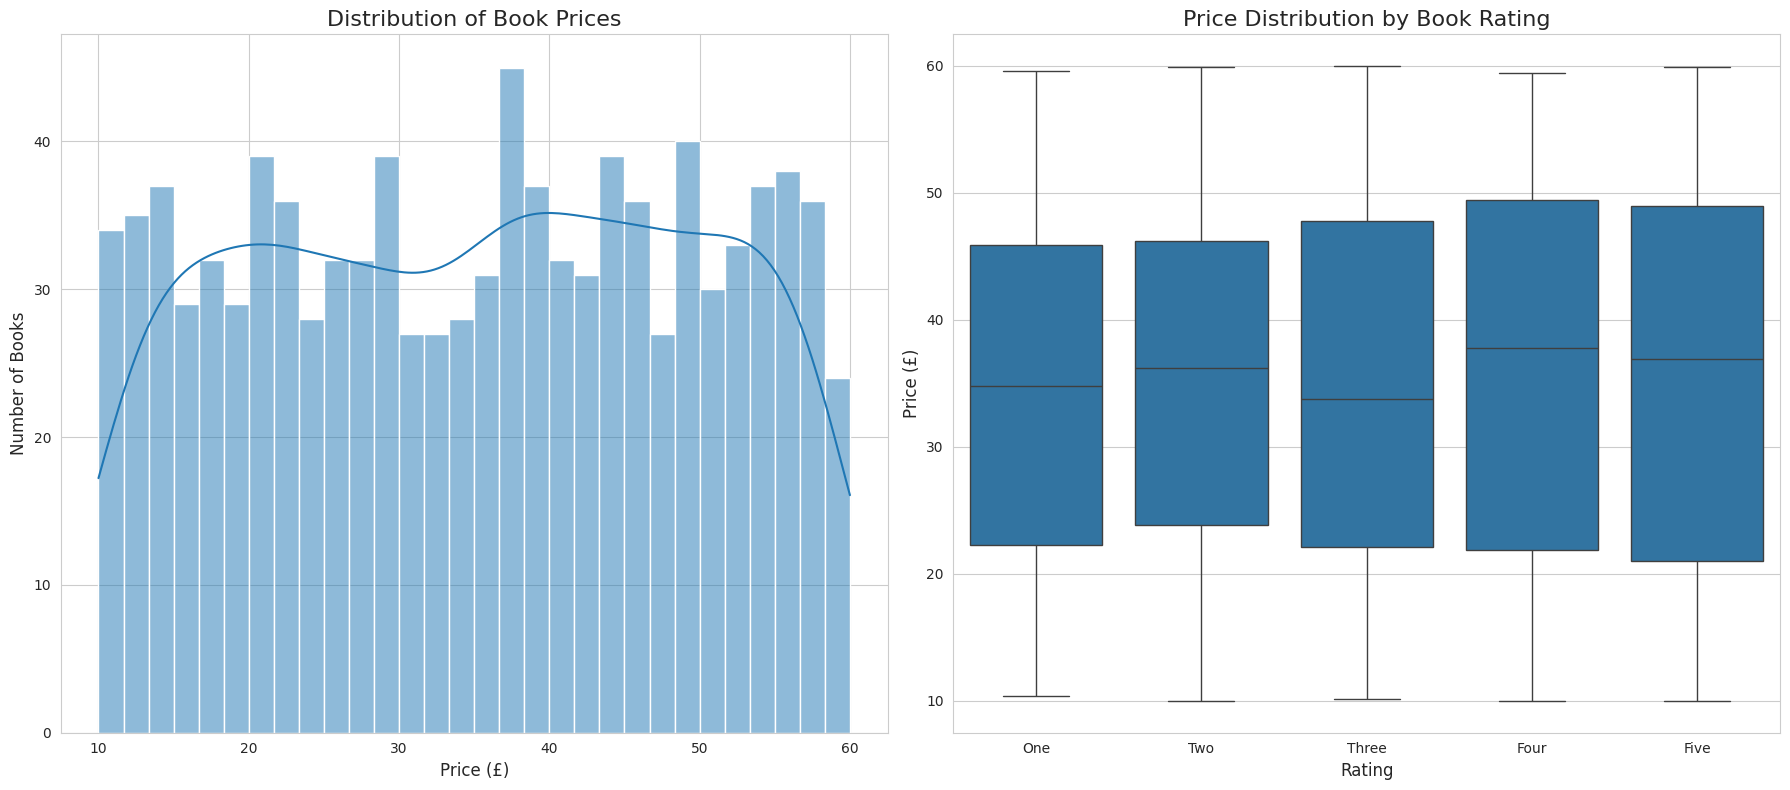


--- Top 10 Most Expensive Books ---


,title,price,rating
648,The Perfect Play (Play by Play #1),59.99,Three
617,Last One Home (New Beginnings #1),59.98,Three
860,Civilization and Its Discontents,59.95,Two
560,The Barefoot Contessa Cookbook,59.92,Five
366,The Diary of a Young Girl,59.90,Three
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71,Three
133,Thomas Jefferson and the Tripoli Pirates: The ...,59.64,One
387,Boar Island (Anna Pigeon #19),59.48,Three
549,The Man Who Mistook His Wife for a Hat and Oth...,59.45,Four
393,The Improbability of Love,59.45,One


In [8]:

# 5. VISUALIZE THE DATA TO FIND INSIGHTS


print("--- Creating Visualizations ---")


plt.figure(figsize=(18, 8))

# Plot 1: What is the distribution of prices? 
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Book Prices', fontsize=16)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

#  Plot 2: Is there a relationship between rating and price? 
plt.subplot(1, 2, 2) 
rating_order = ['One', 'Two', 'Three', 'Four', 'Five']
sns.boxplot(data=df, x='rating', y='price', order=rating_order)
plt.title('Price Distribution by Book Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price (£)', fontsize=12)


plt.tight_layout()
plt.show()

#  Finding the Top 10 Most Expensive Books 
print("\n--- Top 10 Most Expensive Books ---")
most_expensive_books = df.sort_values(by='price', ascending=False).head(10)
display(most_expensive_books[['title', 'price', 'rating']])